In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Importamos dataset de diabetes
Dataset obtenido de https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [3]:
pwd

'C:\\Users\\usuario\\Desktop\\clase_03-master'

In [4]:
diabetes = pd.read_csv('C:/Users/usuario/Desktop/clase_03-master/clusterai_2019_clase03_dataset_diabetes.csv', delimiter=',')

In [5]:
diabetes.shape

(768, 9)

In [7]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Preprocesamiento

1) Revisar si hay NaNs. Decidir si eliminar o no las filas que tengan NaNs.

In [8]:
col_NaN = diabetes.isnull().any()
col_NaN

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [9]:
diabetes.isnull().sum().sort_values(ascending=False)

Outcome                     0
Age                         0
DiabetesPedigreeFunction    0
BMI                         0
Insulin                     0
SkinThickness               0
BloodPressure               0
Glucose                     0
Pregnancies                 0
dtype: int64

2) Realizar un "pairplot" con seaborn con todas las features.

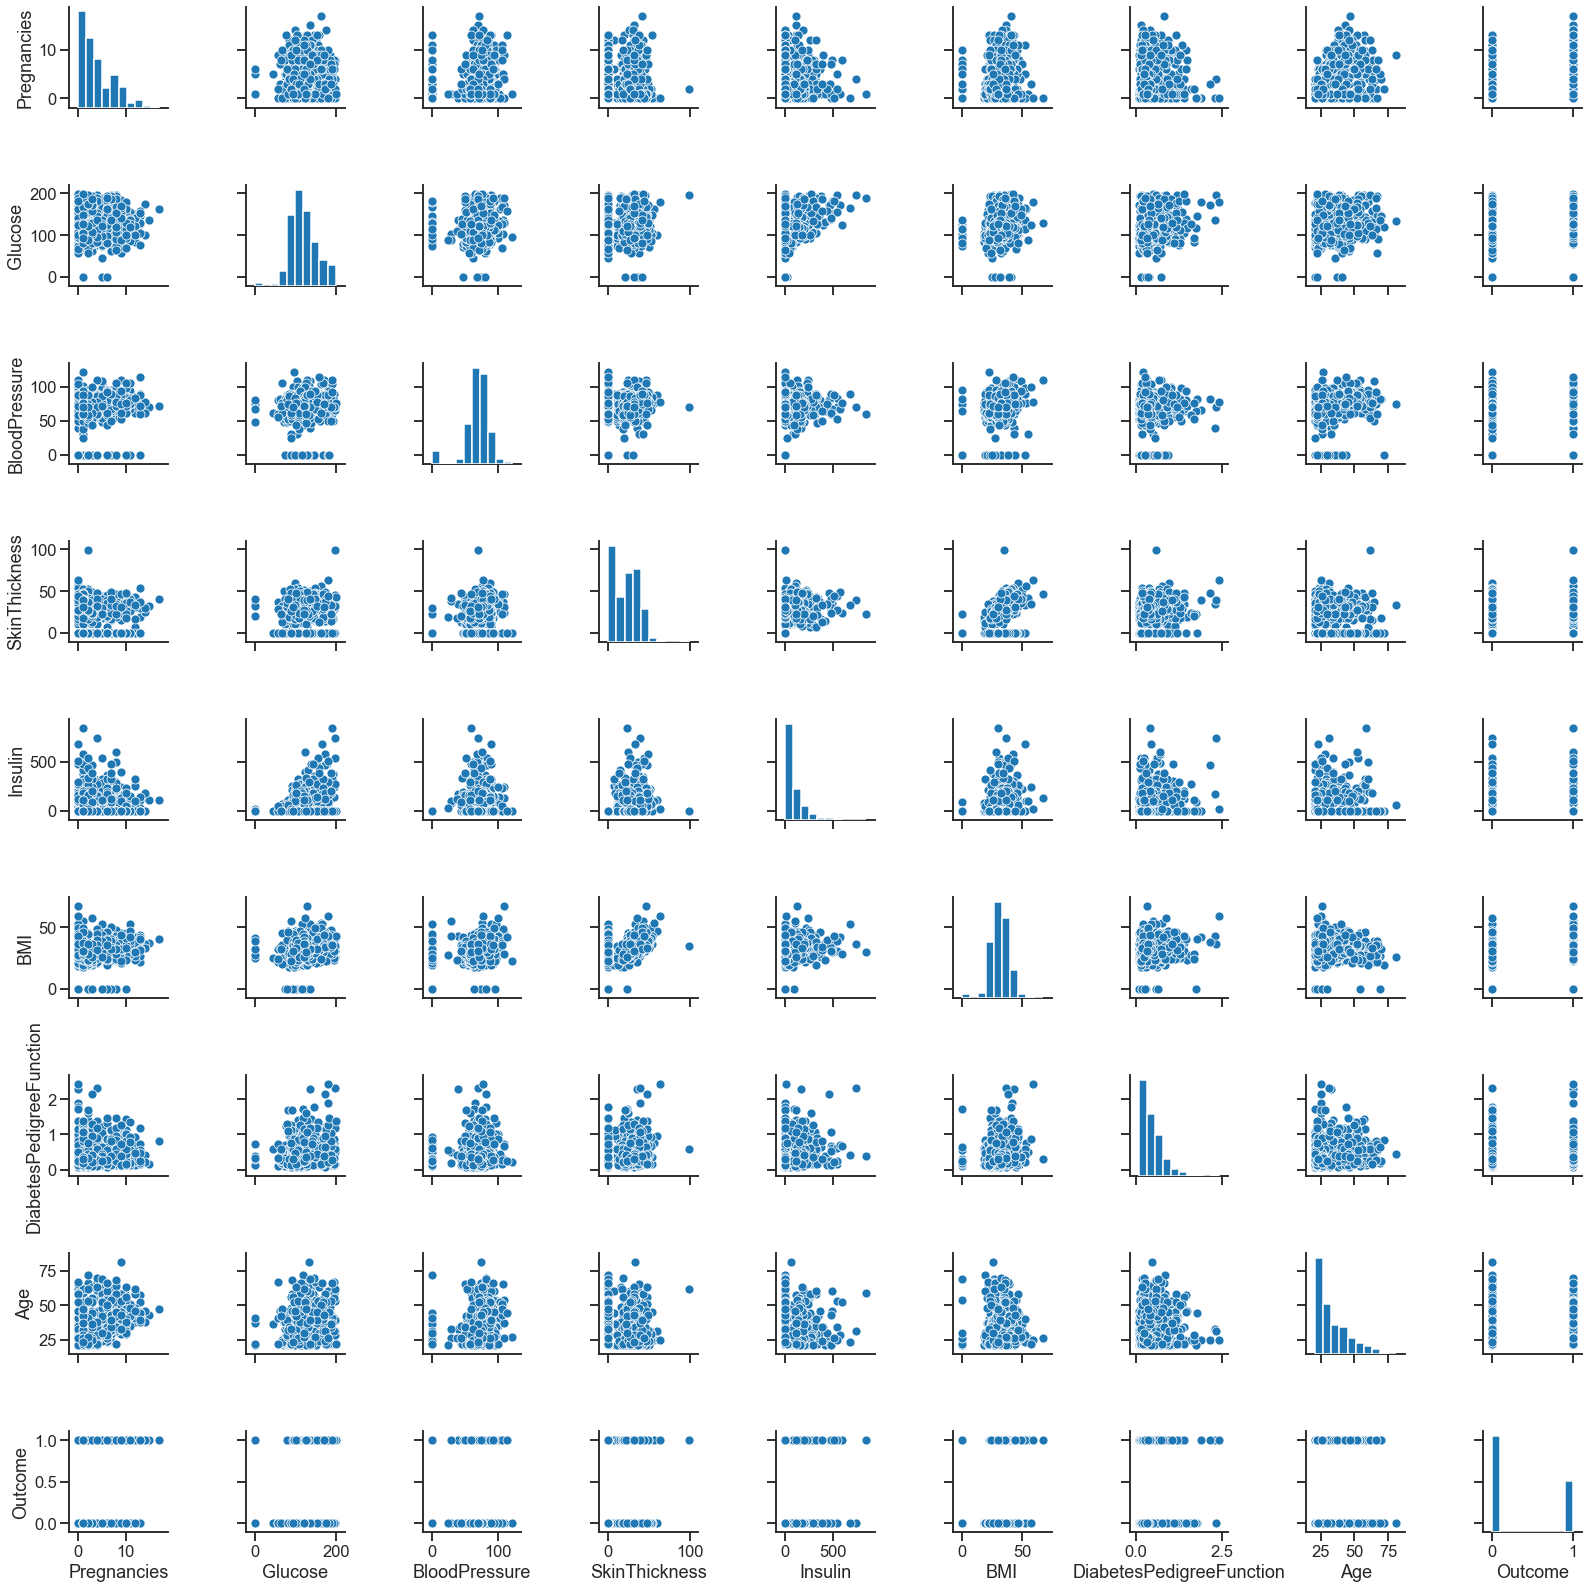

In [10]:
sns.set_style("white")
sns.set_context("talk")
sns.set_style("ticks")
sns.pairplot(diabetes)
plt.show()


# Preparar el dataset para Machine Learning

3) Separar los datos con los que vamos a trabajar con Clasificacion. Definir cual sera la matrix X de samples y features y cual sera la variable dependiente/objetivo Y.

In [11]:
x = diabetes.iloc[:,0:8]
x.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32


In [12]:
y = diabetes.iloc[:,8]
y.head(3)

0    1
1    0
2    1
Name: Outcome, dtype: int64

In [18]:
print(y.shape)
print(x.shape)

(768,)
(768, 8)


4) Dividir nuestros datos en Train y Test con "train_test_split" de Scikit Learn

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=4)
print(xtrain.shape)
print(ytrain.shape)

(537, 8)
(537,)


5) Realizar autoscaling con el train set. Una vez autoescalados los datos, ajustar los datos del test con el autoscaling realizado.

In [15]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(xtrain)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
xtrain_scaled = scaler.transform(xtrain)  
print(xtrain_scaled.mean(axis=0))
print(xtrain_scaled.std(axis=0))

[-4.63109791e-17 -2.08399406e-16  1.68704281e-16 -1.14950466e-16
 -2.31554895e-17 -6.88048832e-16 -8.76600675e-17  9.26219581e-17]
[1. 1. 1. 1. 1. 1. 1. 1.]


In [19]:
xtest_scaled = scaler.transform(xtest)  
print(xtest_scaled.mean(axis=0))
print(xtest_scaled.std(axis=0))

[ 0.04401172  0.02889856  0.14912206  0.03363381 -0.05088954  0.07690012
 -0.07036712  0.0698849 ]
[1.01944691 1.12817755 0.87057588 0.98138806 1.1427082  0.80176756
 0.96269815 1.03100468]


# CROSS VALIDATION

In [21]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [24]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100, 1000], 'gamma':[0.0001,0.001, 0.01, 0.1,1, 10,100]}
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid = parameters, refit = True, cv = 5)


In [32]:
clf.fit(xtrain_scaled, ytrain.ravel())

C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [34]:
print("The best parameters are %s with a score of %0.3f" %(clf.best_params_, clf.best_score_))

The best parameters are {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'} with a score of 0.758


In [37]:
y_pred=clf.predict(xtest_scaled) 
print(y_pred)


[0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1
 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1
 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1
 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1
 1 0 0 1 1 0 0 0 0]


In [38]:
print(clf.score(xtest_scaled,ytest.ravel())) 

0.7792207792207793


# Entrenar un modelo clasificador

6) Crear y entrenar un modelo clasificador de Logistic Regression. 

In [78]:
lr = LogisticRegression()

In [79]:
lr.fit(xtrain_scaled, ytrain)

C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
ypred = lr.predict(xtest_scaled)


In [88]:
np.shape(ypred)

(231,)

In [84]:
#Error de train
np.sqrt(mean_squared_error(ytest, ypred))

0.43144777916589877

In [85]:
mean_squared_error(ytest, ypred)

0.18614718614718614

In [86]:
from sklearn.metrics import mean_absolute_error

In [87]:
mean_absolute_error(ytest, ypred)

0.18614718614718614

7) Testear el modelo entrenado con los datos de test.

8) Evaluar la performance del modelo con Accuracy, AUC ROC, Matriz de confusion.

In [92]:
#Accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(xtest_scaled, ytest.ravel())))

Accuracy of logistic regression classifier on test set: 0.81


In [96]:
cma = confusion_matrix(ytest, ypred)
cma

array([[136,  16],
       [ 27,  52]], dtype=int64)

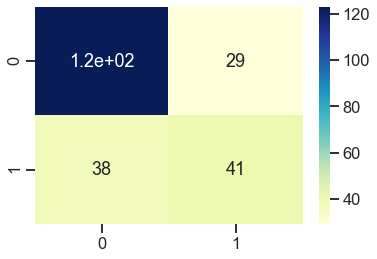

In [98]:
df_cma = pd.DataFrame(cm, index = [i for i in np.unique(y)],columns = [i for i in np.unique(y)])
sns.heatmap(df_cma, annot=True, cmap="YlGnBu")
plt.show()

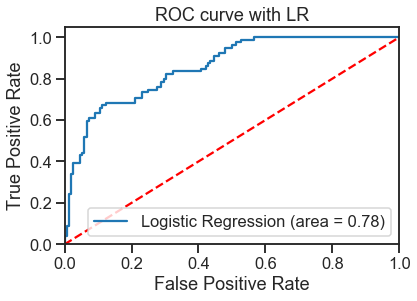

In [101]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(ytest, lr.predict(xtest_scaled))
fpr, tpr, thresholds = roc_curve(ytest, lr.predict_proba(xtest_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve with LR')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

9) Repetir el proceso de entrenamiento con el modelo KNN

In [40]:
neigh = KNeighborsClassifier(n_neighbors=5)

In [42]:
neigh.fit(xtrain_scaled, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [45]:
ypred = neigh.predict(xtest_scaled)
ypred

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [47]:
test_acc = accuracy_score(ytest, ypred)
print("El accuracy es " + str(test_acc))


El accuracy es 0.70995670995671


In [49]:
yproba = neigh.predict_proba(xtest_scaled)
fpr1, tpr1, thresholds = roc_curve(ytest.astype('int'), yproba[:,1], drop_intermediate = False)
auc = metrics.auc(fpr1, tpr1)
print("El AUC es = " + str(auc))


El AUC es = 0.7508744170552965


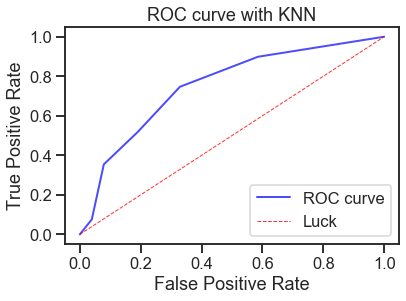

In [51]:
plt.plot(fpr1, tpr1, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with KNN')
plt.show()


In [53]:
cm = confusion_matrix(ytest, ypred)
cm


array([[123,  29],
       [ 38,  41]], dtype=int64)

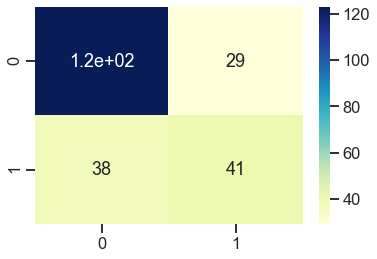

In [58]:
df_cm = pd.DataFrame(cm, index = [i for i in np.unique(y)],columns = [i for i in np.unique(y)])
sns.heatmap(df_cm, annot=True, cmap="YlGnBu")
plt.show()



10) Repetir el proceso de entrenamiento con el modelo SVM

In [108]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(xtrain_scaled, ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [111]:
y_pred = svclassifier.predict(xtest_scaled)
y_pred.shape

(231,)

In [110]:
from sklearn.metrics import classification_report
print(confusion_matrix(ytest,y_pred))
print(classification_report(ytest,y_pred))

[[129  23]
 [ 30  49]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       152
           1       0.68      0.62      0.65        79

    accuracy                           0.77       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231

